# download and read dataset

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from sklearn import datasets
from sklearn.model_selection import train_test_split 
iris = datasets.load_iris()
X = iris.data[:, :]  # we only take the first two features.
y = iris.target

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size=0.20, random_state=42)

In [3]:
print("Train data: ", train_data.shape)
print("Train labels: ", train_labels.shape)
print("Test data: ", test_data.shape)
print("Test labels: ", test_labels.shape)


Train data:  (120, 4)
Train labels:  (120,)
Test data:  (30, 4)
Test labels:  (30,)


In [0]:
train_labels_onehot = []
test_labels_onehot = []
for i in train_labels:
  train_labels_onehot.append(np.zeros((3)))
  train_labels_onehot[-1][i]=1

for i in test_labels:
  test_labels_onehot.append(np.zeros((3)))
  test_labels_onehot[-1][i]=1

train_labels_onehot = np.asarray(train_labels_onehot)
test_labels_onehot = np.asarray(test_labels_onehot)

In [0]:
def sigmoid(x):
  return 1.0 / (1 + np.exp(-x))

def sigmoid_d(x):
  return np.multiply(sigmoid(x),(1-sigmoid(x)))


def next_batch(X, y, batchSize):
  idx = np.random.choice(len(X),batchSize,replace=False)
  return X[idx], y[idx]

def evale_model(X, Y_train, W):
  (W1,W2,b1,b2) = W
  z1 = np.dot(X,W1)+b1
  a1 = sigmoid(z1)
  z2 = np.dot(a1,W2)+b2
  a2 = sigmoid(z2)
  loss = np.power(Y_train-a2,2).mean(0)
  loss = np.sum(loss)
  return a2,loss

def cal_grad(X, Y_train, W):
  (W1,W2,b1,b2) = W
  z1 = np.dot(X,W1)+b1
  a1 = sigmoid(z1)
  z2 = np.dot(a1,W2)+b2
  a2 = sigmoid(z2)
  loss = np.power(Y_train-a2,2).mean(0)
  loss = np.sum(loss)
  # print(loss)
  
  grad2=np.multiply((Y_train-a2),sigmoid_d(z2))
  grad1=np.multiply(np.dot(grad2,W2.T),sigmoid_d(z1))

  gradw = [np.dot(X.T,grad1),np.dot(a1.T,grad2)]
  gradb = [grad1,grad2]
  
  return gradw,gradb,loss


In [0]:
hidden_n = 3
output_shape = 3
nInput = 4
W1 = np.random.rand(nInput,hidden_n)
W2 = np.random.rand(hidden_n,output_shape)
b1 = np.zeros(hidden_n)
b2 = np.zeros(output_shape)


velocity_W1 = np.zeros_like(W1)
velocity_W2 = np.zeros_like(W2)
velocity_b1 = np.zeros_like(b1)
velocity_b2 = np.zeros_like(b2)


In [0]:
iterations = 10
datas_len = train_data.shape[0]
batchSize = 4

loss_train = []
loss_test = []

alpha = 0.01
gamma = 0.9
decay  = 0.9
for iteration in range(iterations):
  temp = []

  for batchs in range(int(datas_len/batchSize)):

    X, Y_train = next_batch(train_data, train_labels_onehot, batchSize=batchSize)
    gradw,gradb,loss_cal = cal_grad(X, Y_train,(W1,W2,b1,b2))

    velocity_W1 = gamma * velocity_W1 + alpha * gradw[0]
    velocity_W2 = gamma * velocity_W2 + alpha * gradw[1]
    velocity_b1 = gamma * velocity_b1 + alpha * gradb[0].mean(0)
    velocity_b2 = gamma * velocity_b2 + alpha * gradb[1].mean(0)


    W1 = W1 + velocity_W1
    W2 = W2 + velocity_W2
    b1 = b1 + velocity_b1
    b2 = b2 + velocity_b2  

    temp.append(loss_cal)
  
  _,loss_cal = evale_model(test_data, test_labels_onehot, (W1,W2,b1,b2))
  loss_test.append(loss_cal)
  alpha *= decay
  loss_train.append(np.mean(temp))


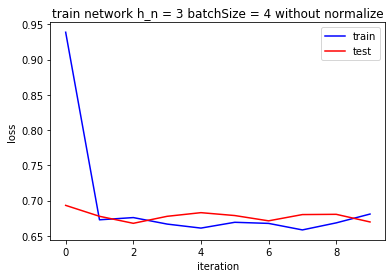

In [8]:
plt.plot(loss_train,'b')
plt.plot(loss_test,'r')
plt.legend(['train','test'])
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('train network ' + 'h_n = ' + str(hidden_n)+' batchSize = '+ str(batchSize) + ' without normalize')
plt.savefig('./'+'train network ' + 'h_n = ' + str(hidden_n)+' batchSize = '+ str(batchSize) + ' without normalize')
plt.show()

# normalize  data

In [12]:
train_data = train_data/np.max(train_data,axis=0)
print("Train data reshaped: ", train_data.shape)
test_data = test_data/np.max(train_data,axis=0)
print("Test data reshaped: ", test_data.shape)

Train data reshaped:  (120, 4)
Test data reshaped:  (30, 4)


In [0]:
hidden_n = 3
output_shape = 3
nInput = 4
W1 = np.random.rand(nInput,hidden_n)
W2 = np.random.rand(hidden_n,output_shape)
b1 = np.zeros(hidden_n)
b2 = np.zeros(output_shape)


velocity_W1 = np.zeros_like(W1)
velocity_W2 = np.zeros_like(W2)
velocity_b1 = np.zeros_like(b1)
velocity_b2 = np.zeros_like(b2)


In [0]:
iterations = 10
datas_len = train_data.shape[0]
batchSize = 2

loss_train = []
loss_test = []

alpha = 0.01
gamma = 0.9
decay  = 0.9
for iteration in range(iterations):
  temp = []

  for batchs in range(int(datas_len/batchSize)):

    X, Y_train = next_batch(train_data, train_labels_onehot, batchSize=batchSize)
    gradw,gradb,loss_cal = cal_grad(X, Y_train,(W1,W2,b1,b2))

    velocity_W1 = gamma * velocity_W1 + alpha * gradw[0]
    velocity_W2 = gamma * velocity_W2 + alpha * gradw[1]
    velocity_b1 = gamma * velocity_b1 + alpha * gradb[0].mean(0)
    velocity_b2 = gamma * velocity_b2 + alpha * gradb[1].mean(0)


    W1 = W1 + velocity_W1
    W2 = W2 + velocity_W2
    b1 = b1 + velocity_b1
    b2 = b2 + velocity_b2  

    temp.append(loss_cal)
  
  _,loss_cal = evale_model(train_data, train_labels_onehot, (W1,W2,b1,b2))
  loss_test.append(loss_cal)
  alpha *= decay
  loss_train.append(np.mean(temp))


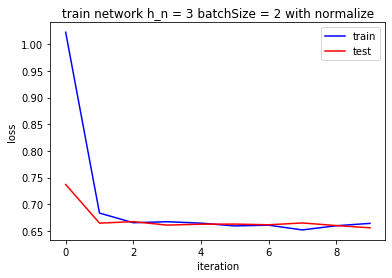

In [15]:
plt.plot(loss_train,'b')
plt.plot(loss_test,'r')
plt.legend(['train','test'])
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('train network ' + 'h_n = ' + str(hidden_n)+' batchSize = '+ str(batchSize) + ' with normalize')
plt.savefig('./'+'train network ' + 'h_n = ' + str(hidden_n)+' batchSize = '+ str(batchSize) + ' with normalize')
plt.show()
